# Amazon Warehouse Efficiency Analysis

This project analyzes operational performance using simulated warehouse data. It focuses on key metrics like processing time, order fulfillment, mispick rates, and efficiency per employee across shifts.

## Key Questions
- Which shift is most productive?
- Which shift is most error-prone?
- Does employee count correlate with performance?

## Key Insights
- **Processing time** is lowest during the **Graveyard shift**, meaning they move fast — but...
- **Graveyard shift** also has the **highest mispick rate**, suggesting a possible trade-off between speed and accuracy.
- **Orders fulfilled** are lower than other shifts, which could indicate staffing issues or inefficiencies despite speed.
- **Orders per employee** doesn't fully make up for the difference, meaning the speed may come at a cost.

## Recommendation
Graveyard shift may benefit from improved quality control and possibly minor workflow adjustments to reduce errors without sacrificing speed.



## Data Overview
Let’s take a look at the basic structure and summary stats of the dataset.


In [2]:
import pandas as pd

df = pd.read_csv("Amazon_Warehouse_Efficiency_Analysis.csv")
df.head()


,OrderID,Date,Shift,OrdersFulfilled,ProcessingTimeMin,EmployeeCount,MisPicks,IdleTimeMin
0,1,2024-03-07,Day,20,14.66,8,0,5.232876
1,2,2024-03-20,Swing,19,9.92,6,0,4.797922
2,3,2024-03-29,Day,20,11.80,7,0,5.626099
3,4,2024-03-15,Swing,20,12.74,10,0,4.924680
4,5,2024-03-11,Day,24,15.48,9,0,8.091425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            500 non-null    int64  
 1   Date               500 non-null    object 
 2   Shift              500 non-null    object 
 3   OrdersFulfilled    500 non-null    int64  
 4   ProcessingTimeMin  500 non-null    float64
 5   EmployeeCount      500 non-null    int64  
 6   MisPicks           500 non-null    int64  
 7   IdleTimeMin        500 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 31.4+ KB


In [6]:
df.describe()

,OrderID,OrdersFulfilled,ProcessingTimeMin,EmployeeCount,MisPicks,IdleTimeMin
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,19.992000,12.159520,9.530000,0.062000,5.051071
std,144.481833,4.260545,3.092049,2.880572,0.241397,1.979656
min,1.000000,9.000000,3.720000,5.000000,0.000000,0.000000
25%,125.750000,17.000000,10.015000,7.000000,0.000000,3.697845
50%,250.500000,20.000000,12.145000,10.000000,0.000000,4.937305
75%,375.250000,23.000000,14.360000,12.000000,0.000000,6.475337
max,500.000000,33.000000,21.760000,14.000000,1.000000,10.067032


In [8]:
df.groupby("Shift")["ProcessingTimeMin"].mean().sort_values()


Shift
Graveyard    11.846696
Swing        12.152263
Day          12.351077
Name: ProcessingTimeMin, dtype: float64

Matplotlib is building the font cache; this may take a moment.


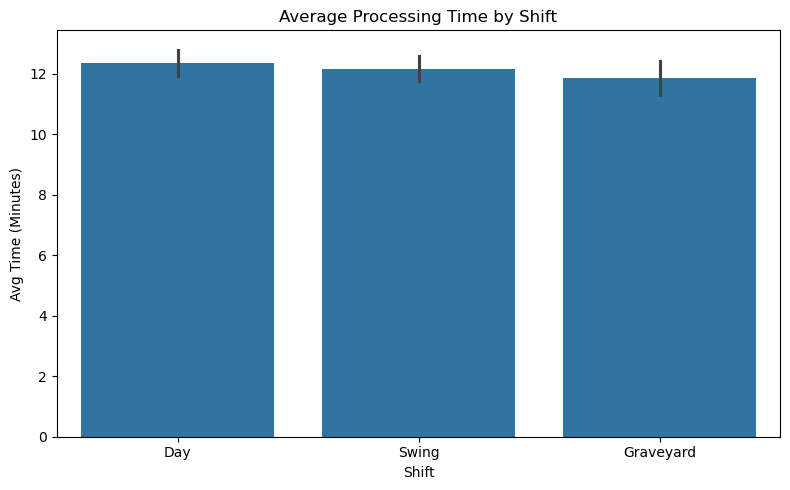

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x="Shift", y="ProcessingTimeMin", data=df, estimator="mean")
plt.title("Average Processing Time by Shift")
plt.ylabel("Avg Time (Minutes)")
plt.xlabel("Shift")
plt.tight_layout()
plt.show()


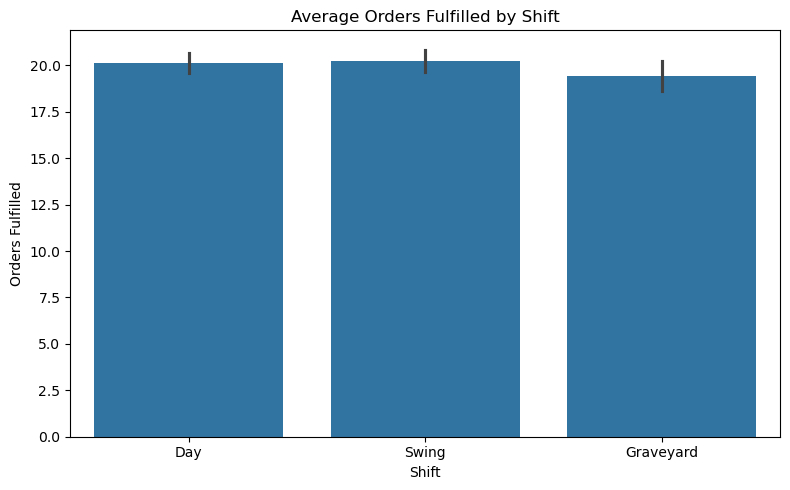

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Shift", y="OrdersFulfilled", data=df, estimator="mean")
plt.title("Average Orders Fulfilled by Shift")
plt.ylabel("Orders Fulfilled")
plt.xlabel("Shift")
plt.tight_layout()
plt.show()


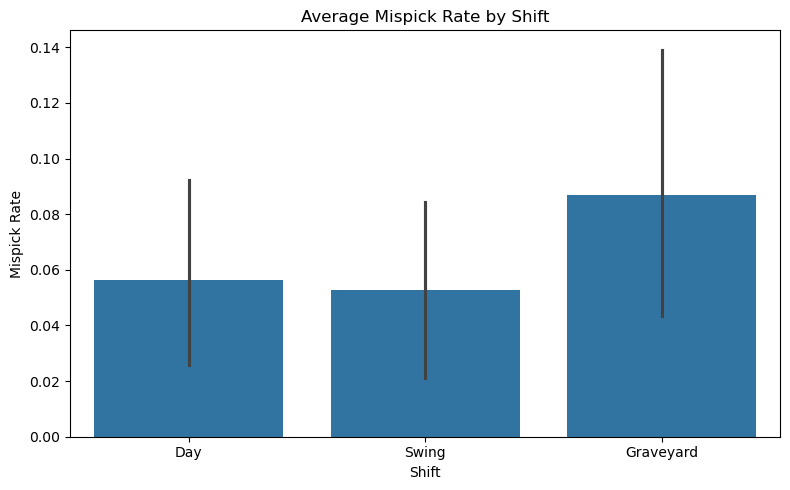

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Shift", y="MisPicks", data=df, estimator="mean")
plt.title("Average Mispick Rate by Shift")
plt.ylabel("Mispick Rate")
plt.xlabel("Shift")
plt.tight_layout()
plt.show()


In [16]:
df["OrdersPerEmployee"] = df["OrdersFulfilled"] / df["EmployeeCount"]


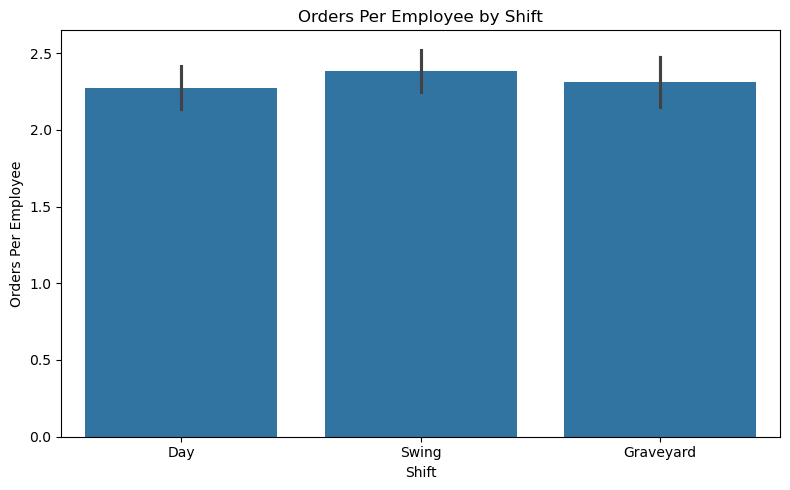

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Shift", y="OrdersPerEmployee", data=df, estimator="mean")
plt.title("Orders Per Employee by Shift")
plt.ylabel("Orders Per Employee")
plt.xlabel("Shift")
plt.tight_layout()
plt.show()
